In [1]:
import csv
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Separa em arquivos

In [2]:
# Define the input and output file names
input_filename = "putty.csv"
output_dir = "EXP0/"
filename = None

# Initialize flags to control whether to write lines to the output file
writing_enabled = False
iteration = 0

# Open the input and output files
with open(input_filename, "r") as input_file:
    # Iterate through lines in the input file
    for line in input_file:
        # Check if the line contains the "---" symbol to start writing
        if "Filename: " in line:
            filename = line.strip("Filename: ")
            filename = filename.strip("\n")
            continue  # Skip this line
        # Check if the line contains the "---" symbol to start writing
        if "---" in line:
            writing_enabled = True

            # Create new file
            output_filename = output_dir + filename + f'_{iteration}.csv'
            output_file = open( output_filename, "w")
            print(output_filename)

            continue  # Skip this line
        # Check if the line contains the "+++" symbol to stop writing
        elif "+++" in line:
            writing_enabled = False
            iteration = iteration + 1
            continue  # Skip this line
        # If writing is enabled, write the line to the output file
        if writing_enabled:
            output_file.write(line)

EXP0/4.10_10_0.csv
EXP0/4.10_10_1.csv
EXP0/4.10_10_2.csv
EXP0/4.10_10_3.csv
EXP0/4.10_10_4.csv
EXP0/4.10_10_5.csv
EXP0/4.10_10_6.csv


# Converte os dados para SI

In [3]:
def multiply_and_add_column(input_file, output_file, column_name, multiply_constant, add_constant):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Multiply the column values by the multiply_constant and add the add_constant
    df[column_name] = df[column_name] * multiply_constant + add_constant

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)


# Iterate over the files in the folder
for filename in os.listdir('EXP0/'):
    file_path = 'EXP0/' + filename
    multiply_and_add_column(file_path, file_path, 'temp', 165.0/65535.0, -40)
    multiply_and_add_column(file_path, file_path, 'humi', 100.0/65535.0, 0)

    channel_list = ["tgs2600","tgs2603","tgs2611","tgs2602","micsD","micsH","micsA"]
    for i in channel_list:
#         multiply_and_add_column(file_path, file_path, i, 3.3/pow(2,23), 0)
        multiply_and_add_column(file_path, file_path, i, 3.3/pow(2,23), 0)
    print(file_path + ' ok!')


EXP0/4.10_10_0.csv ok!
EXP0/4.10_10_1.csv ok!
EXP0/4.10_10_2.csv ok!
EXP0/4.10_10_3.csv ok!
EXP0/4.10_10_4.csv ok!
EXP0/4.10_10_5.csv ok!
EXP0/4.10_10_6.csv ok!


# Print time series

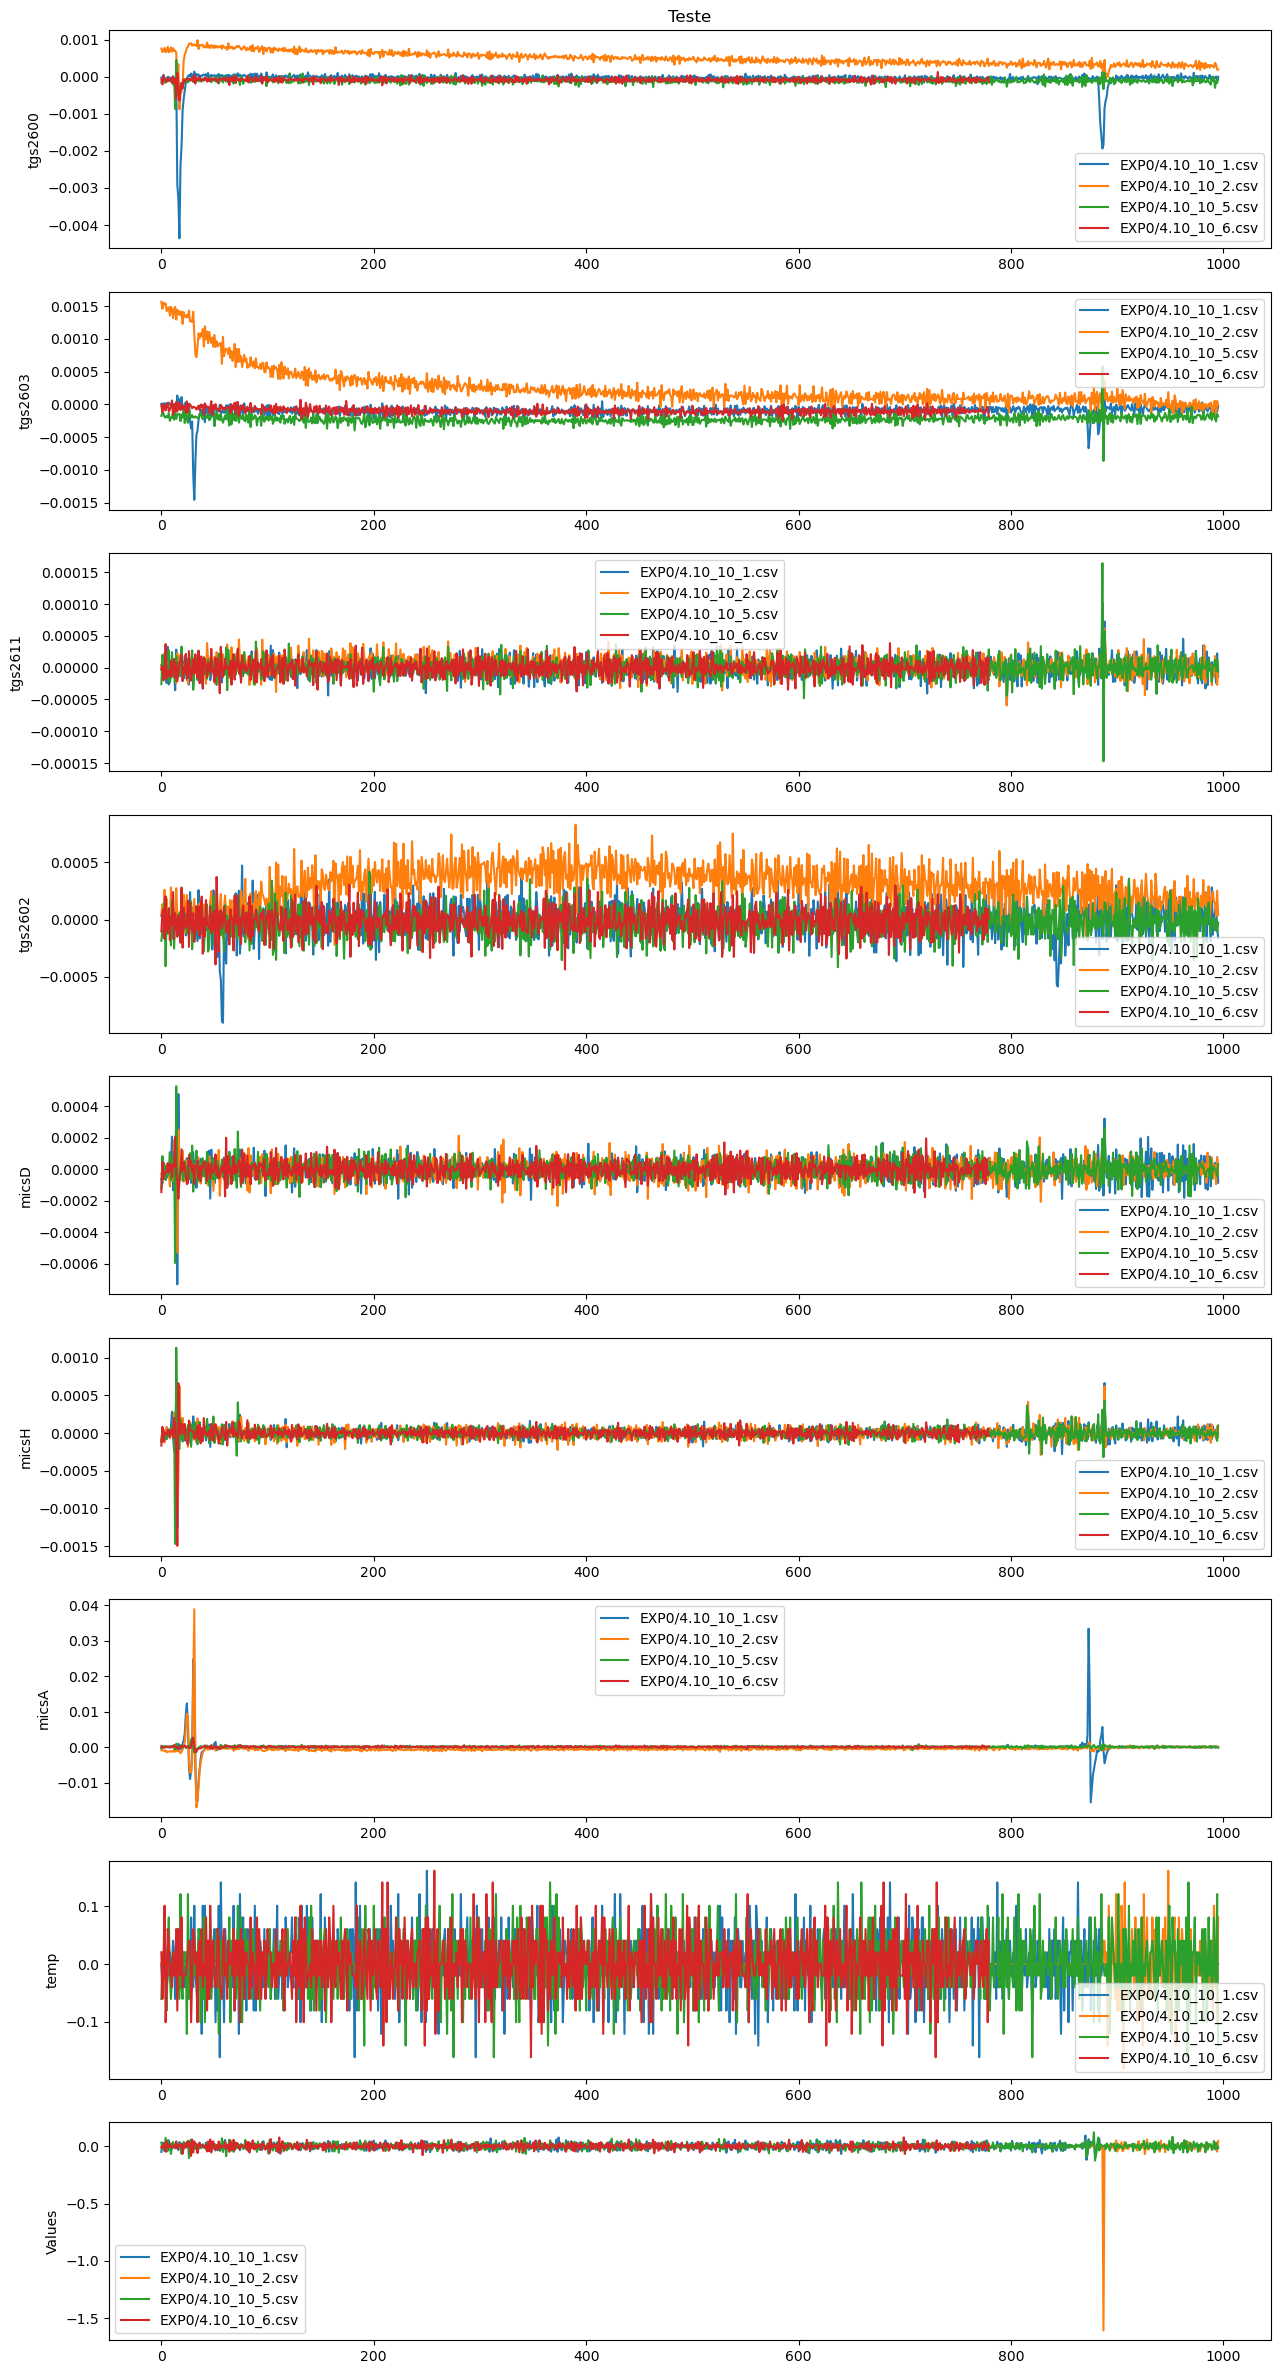

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


### Print in differnt axes
def plot_data_from_csv(csv_file, column_list, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Extract the header names as time vector and data series
    time_vector = 'timestamp'
    
    # Create the figure and axis objects
    fig, ax = plt.subplots(len(column_list), figsize=(15,30))
    color_names = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
    
    ax[0].set_title(graph_name)
    for i in range(len(column_list)):
        ax[i].plot(df[time_vector], df[column_list[i]], color=color_names[i % len(color_names)])
        ax[i].set_ylabel(column_list[i])
        
    ax[i].set_xlabel('Time')
    # Show the plot
    plt.show()

#### Print in the same axes
def plot_2_data_from_csv(csv_file_1,csv_file_2,csv_file_3,csv_file_4, column_list, graph_name):
    # Read the CSV file into a DataFrame
    
    df1 = pd.read_csv(csv_file_1)
    df2 = pd.read_csv(csv_file_2)
    df3 = pd.read_csv(csv_file_3)
    df4 = pd.read_csv(csv_file_4)
    
    # Extract the header names as time vector and data series
    time_vector = 'timestamp'
    
    # Create the figure and axis objects
    fig, ax = plt.subplots(len(column_list), figsize=(15,30))
    color_names = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
    
    ax[0].set_title(graph_name)    
    for i in range(len(column_list)):
        ax[i].plot(df1[time_vector][3:], df1[column_list[i]][3:], label=csv_file_1)
        ax[i].plot(df2[time_vector][3:], df2[column_list[i]][3:], label=csv_file_2)
        ax[i].plot(df3[time_vector][3:], df3[column_list[i]][3:], label=csv_file_3)
        ax[i].plot(df4[time_vector][3:], df4[column_list[i]][3:], label=csv_file_4)
        ax[i].set_ylabel(column_list[i])
        ax[i].legend()  # Add a legend to distinguish curves
    
    ax[i].set_ylabel('Values')
    
    # Show the plot
    plt.show()
    
channel_list = ["tgs2600","tgs2603","tgs2611","tgs2602","micsD","micsH","micsA","temp","humi"]

plot_2_data_from_csv('EXP0/4.10_10_1.csv', 'EXP0/4.10_10_2.csv','EXP0/4.10_10_5.csv','EXP0/4.10_10_6.csv', channel_list, "Teste")
# for filename in os.listdir('EXP0/'):
#     file_path = 'EXP0/' + filename
#     plot_data_from_csv(file_path, channel_list, file_path)
